## Cencus Income

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight).

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data set.

In [2]:
ci = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
ci.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
ci.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
ci.sample(25)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
27624,23,Local-gov,247731,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,0,40,Cuba,<=50K
2311,26,Private,62438,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,>50K
30401,17,?,48703,11th,7,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5732,34,Self-emp-not-inc,353881,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
22964,42,Private,97142,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
9637,57,Private,361324,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
31999,25,Private,237065,Some-college,10,Divorced,Other-service,Own-child,Black,Male,0,0,38,United-States,<=50K
26709,50,Private,134766,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
30911,55,Private,141727,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,3464,0,40,United-States,<=50K
18710,68,Local-gov,31725,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Before going ahead or giving some observations regarding the data set we can see that some of the values are present with "?" symbol instead of some data or Nan values. Hence we will first replace those values with Nan values in the set and then go ahead.

In [8]:
ci.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

So three columns are having those values. We will replace those with Nan.

In [9]:
ci = ci.replace(' ?', np.NaN)

We will also check if any other special charachter data are there in columns which does not have any data but are actually the NaN values.

In [10]:
ci.isin([' ', 'NA','na', '-']).sum().any()

False

So there no other values present with Special characters and now we can proceed ahead.

In [11]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observations:
    
1) There are total 15 columns in the data set which means there are total 14 independent attributes and one target varaible in the data set.

2) There are total more then 32 thousand rows present in the data set which mean there are more then 32 thousand instances of our attributes.

3) There are two types of data present in the set integer(6 columns) & string(9 columns).

4) Some NaN values are present in columns - 'Workclass', 'Occupation','Native_country'. We will be removing them going foward.

All the three columns which are having NaN values are in Object dtype hecne we will fill the values with the mode.

In [12]:
ci['Workclass'].fillna(ci['Workclass'].mode()[0], inplace = True)
ci['Occupation'].fillna(ci['Occupation'].mode()[0], inplace = True)
ci['Native_country'].fillna(ci['Native_country'].mode()[0], inplace = True)

In [13]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

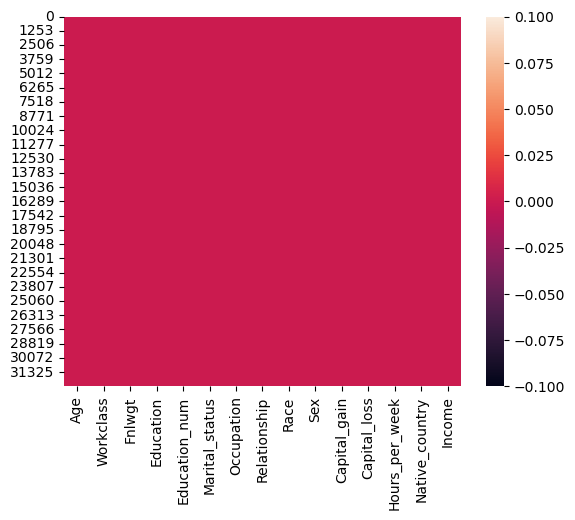

In [14]:
sns.heatmap(ci.isnull())

So we have removed the NaN values from the data set.

In [15]:
ci.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [16]:
ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:
    
1) The columns Columns Capital Gain, capital loss seems not be normal, as it seems most of the rows are having 0 values in them.

2) The Standard Deviation for the all the columns seems to be high with suggests the outliers in them.

In [17]:
ci.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_8212\2610745969.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ci.skew()


Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [18]:
ci.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
7537,27,Private,56870,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
18705,73,Self-emp-not-inc,336007,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
30096,28,Private,407043,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,40,United-States,<=50K
16813,46,Private,237731,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
2778,40,Private,174395,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,60,Greece,<=50K


In [19]:
ci['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


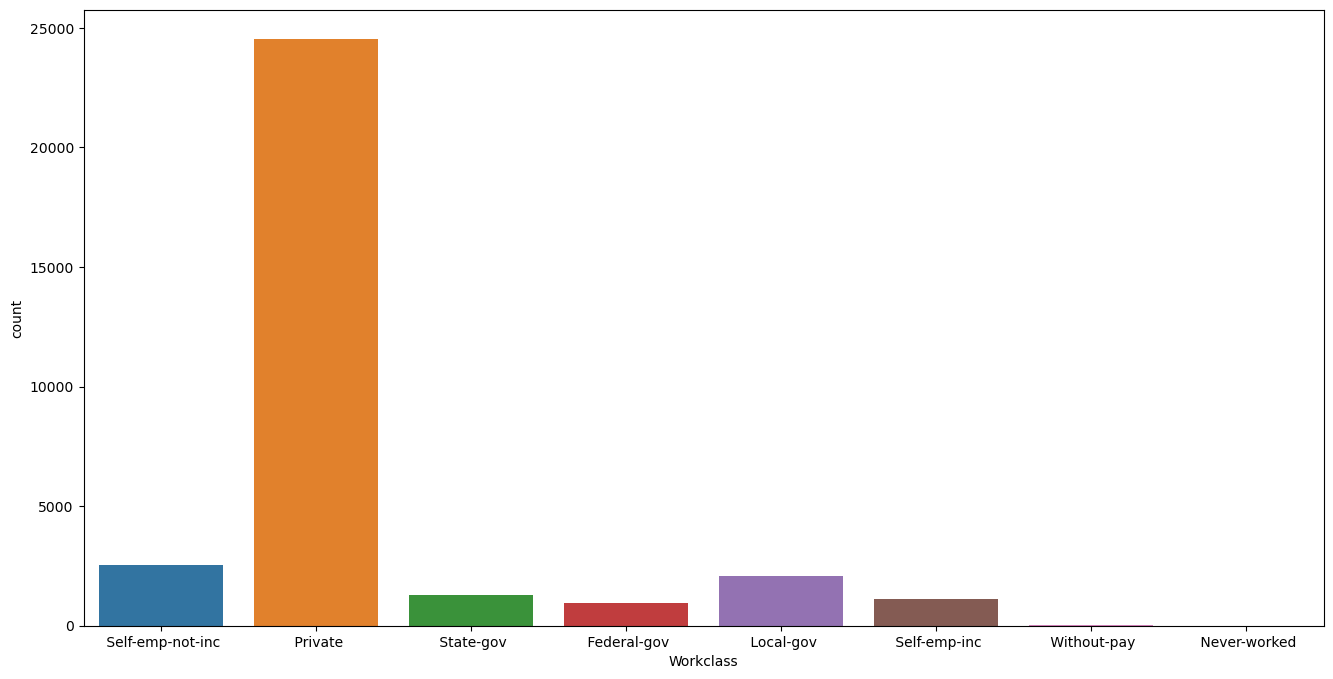

In [20]:
plt.figure(figsize = (16,8))
sns.countplot(ci['Workclass'])
plt.show()

People working in the private job are the highest. Now We will also check how income is distrubuted amont them.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


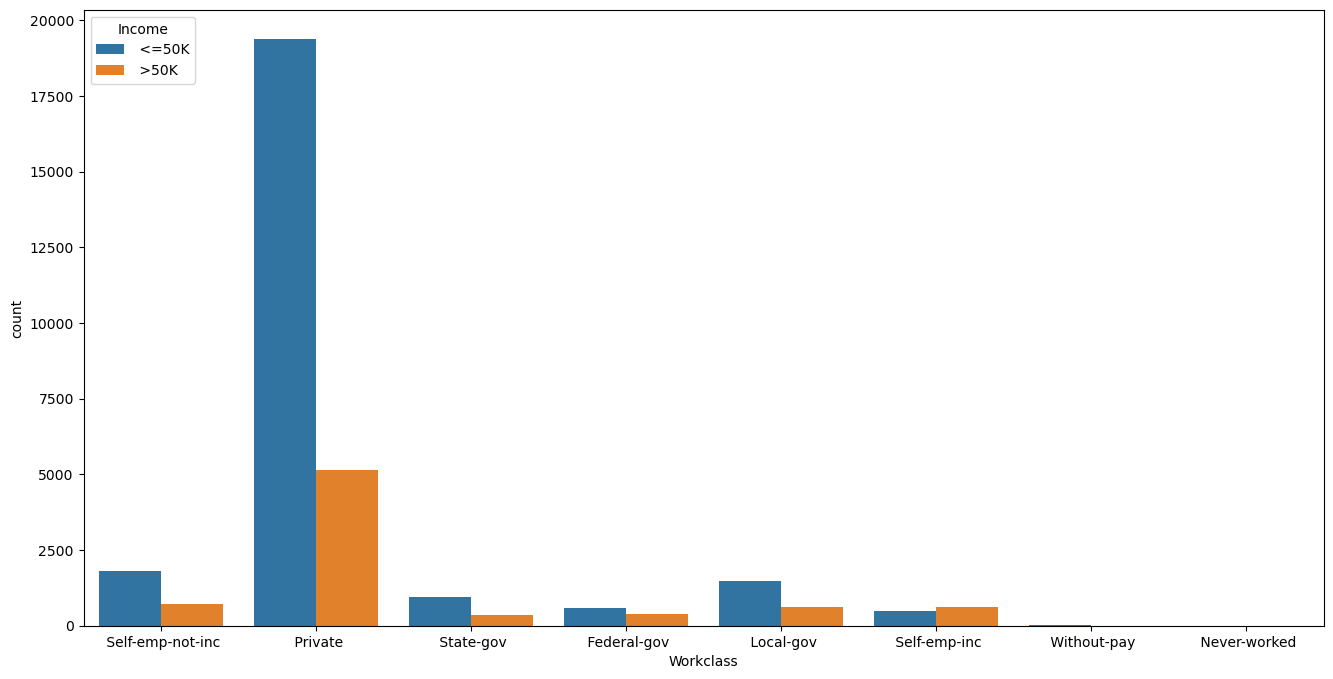

In [21]:
plt.figure(figsize = (16,8))
sns.countplot(ci['Workclass'], hue = ci['Income'])
plt.show()

In [22]:
pd.crosstab(ci['Income'], ci['Workclass'], margins = True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19378,494,1817,944,14,24719
>50K,371,617,0,5154,622,724,353,0,7841
All,960,2093,7,24532,1116,2541,1297,14,32560


1) Here we can see that heighest no. of people are working in private sector followed by self employed not inc.

2) Also for the people in self-emp-inc we can see that they are having more population having more then 50k a year then less then 50K a year.

3) For people in federal gov it can be seen that there is very much less difference in no. population having income less then 50K and more then 50K.

In [23]:
ci.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
31005,61,Private,115023,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,60,United-States,>50K
25523,43,Private,405374,Some-college,10,Separated,Prof-specialty,Not-in-family,Black,Male,0,0,40,United-States,<=50K
17376,51,Self-emp-not-inc,205100,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,30,United-States,>50K
16946,34,Private,34848,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,4064,0,40,United-States,<=50K
7124,54,Self-emp-not-inc,82551,Assoc-voc,11,Married-civ-spouse,Tech-support,Other-relative,White,Female,0,0,10,United-States,<=50K


In [24]:
ci['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


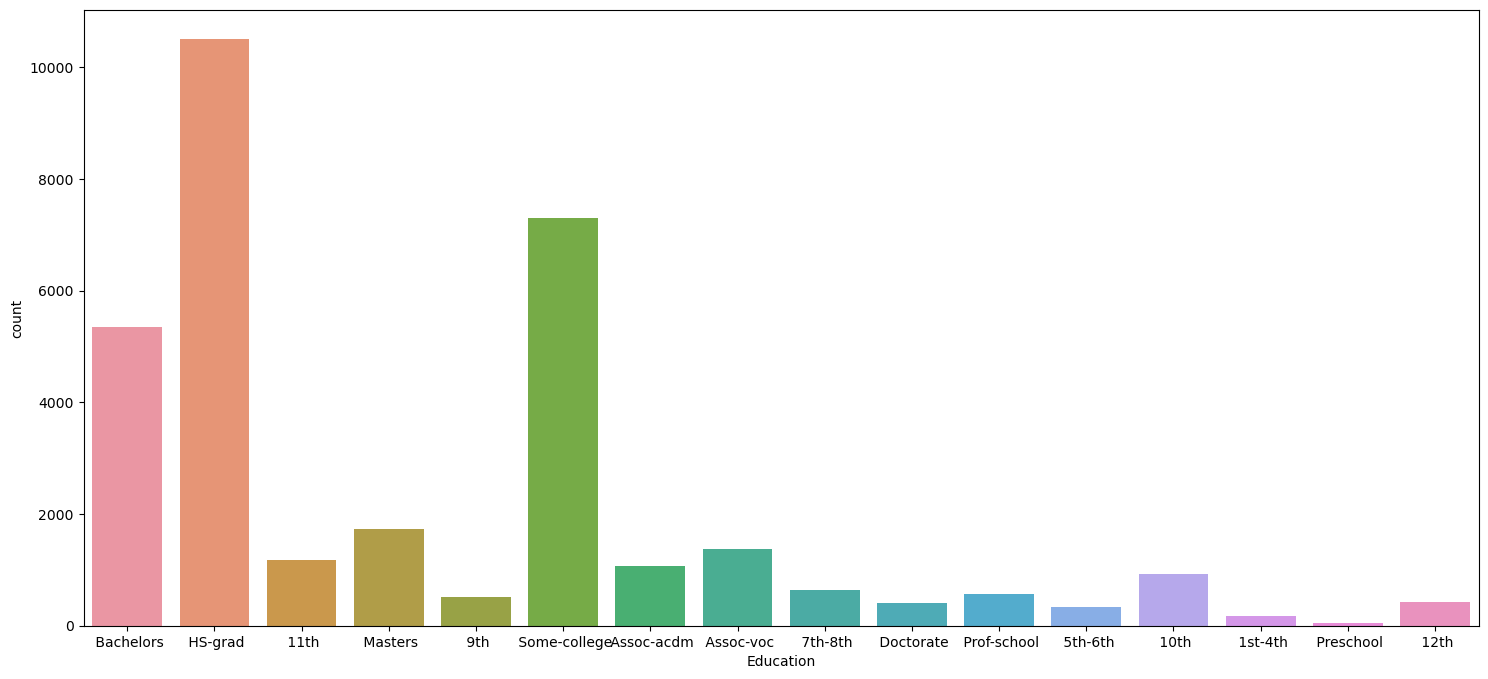

In [25]:
plt.figure(figsize = (18,8))
sns.countplot(ci['Education'])
plt.show()

Highest no. of population belongs to HS-grad education. We will check the same with Income prefererence.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


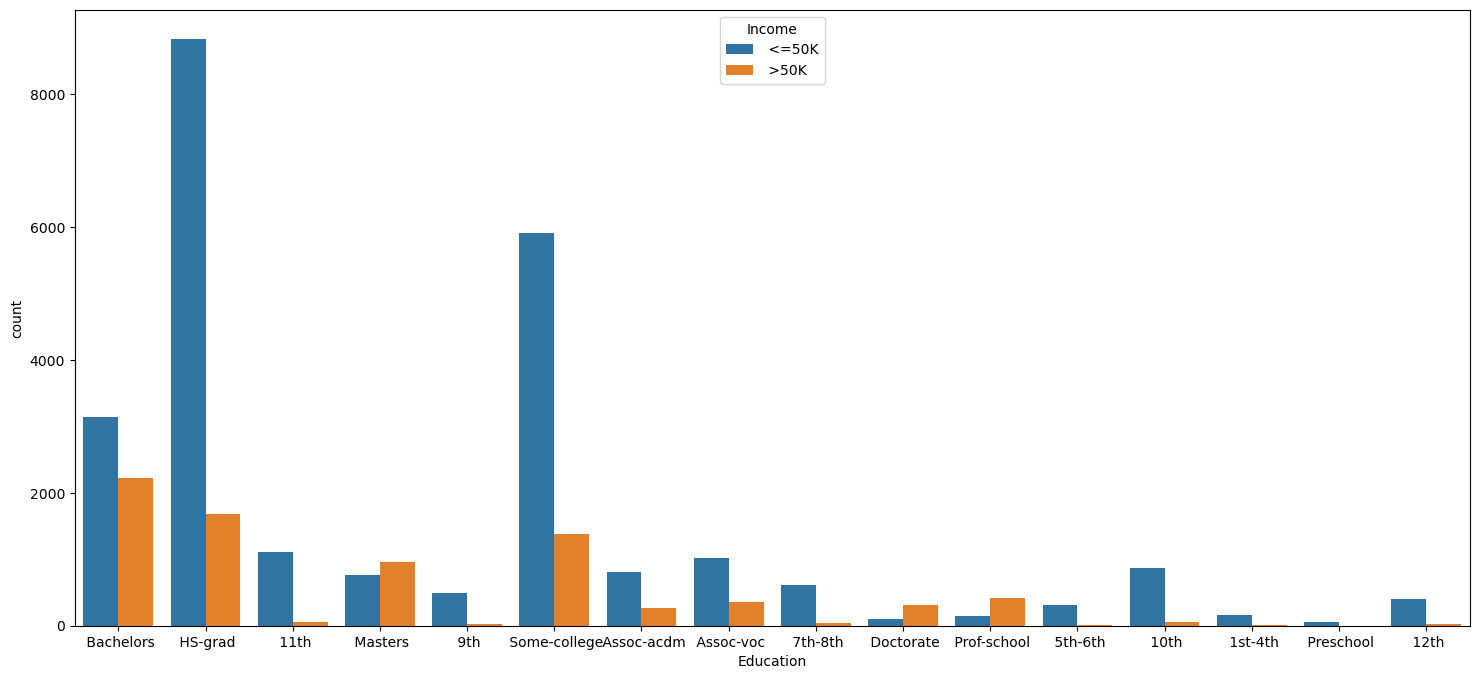

In [26]:
plt.figure(figsize = (18,8))
sns.countplot(ci['Education'], hue = ci['Income'])
plt.show()

In [27]:
pd.crosstab(ci['Income'], ci['Education'], margins = True)

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
Income,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3133,107,8826,764,51,153,5904,24719
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5354,413,10501,1723,51,576,7291,32560


In Doctrate, Masters, prof-school the population having income more then 50K is more as compared to people having income less then 50K.

In [28]:
ci.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
23435,50,Private,160572,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,47,United-States,<=50K


In [29]:
ci['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


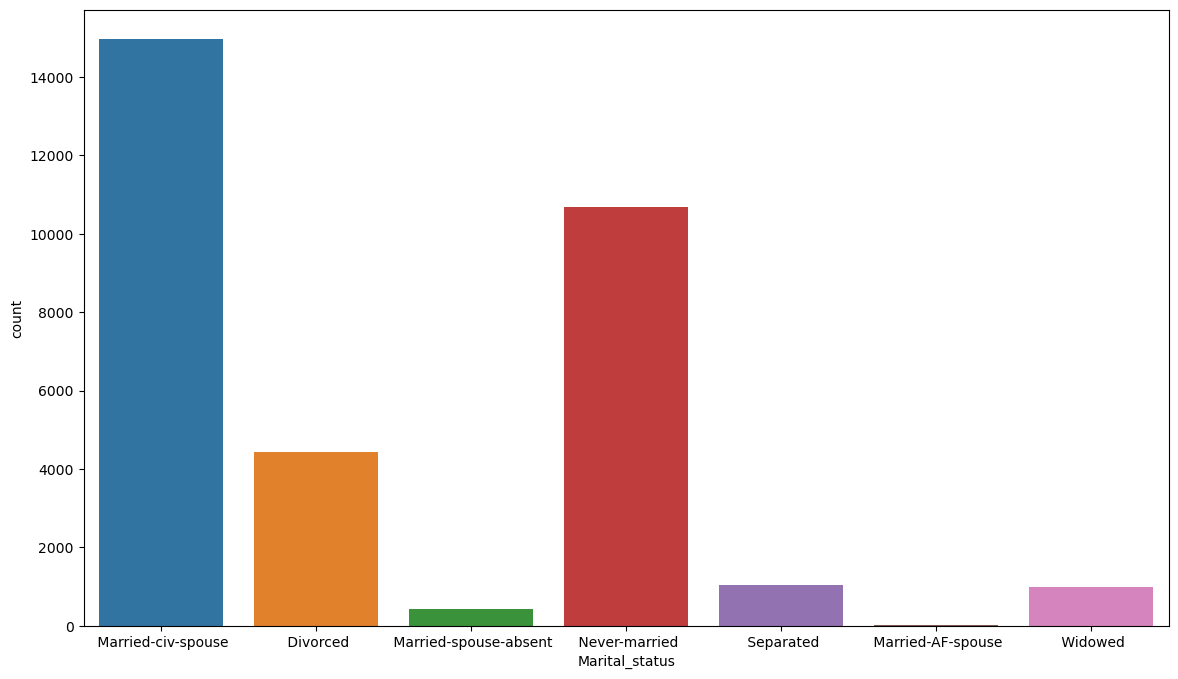

In [30]:
plt.figure(figsize = (14,8))
sns.countplot(ci['Marital_status'])
plt.show()

Population having married status are highest followed by Never married.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


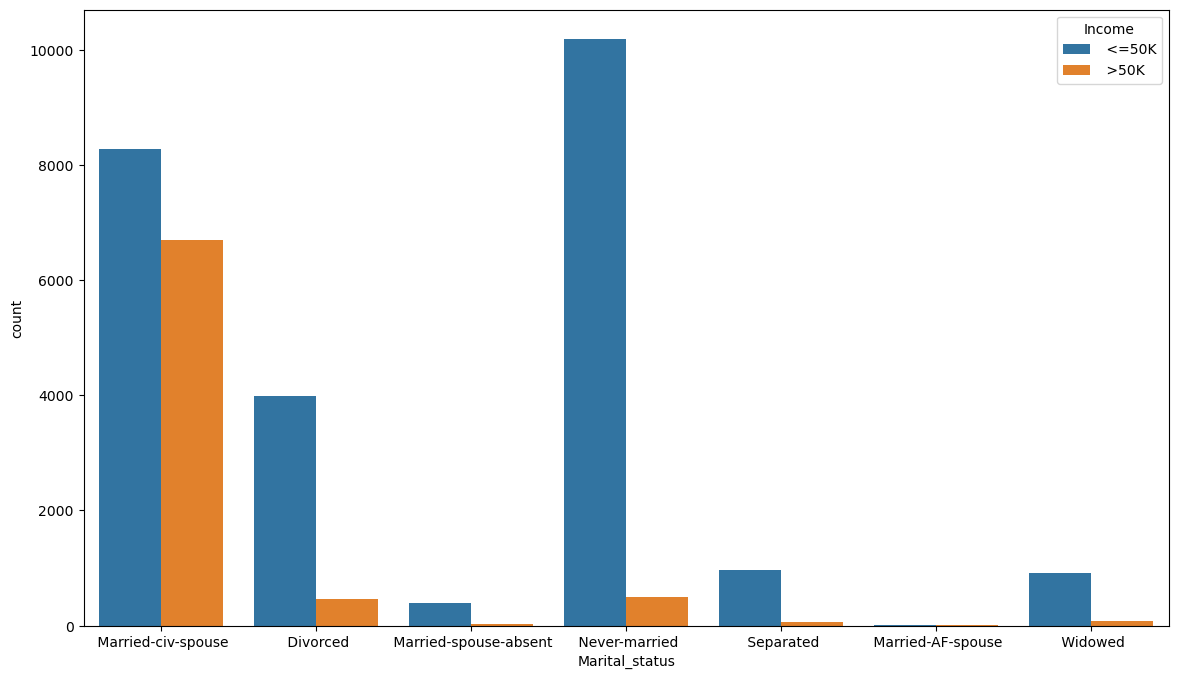

In [31]:
plt.figure(figsize = (14,8))
sns.countplot(ci['Marital_status'], hue = ci['Income'])
plt.show()

In [32]:
pd.crosstab(ci['Income'], ci['Marital_status'], margins = True)

Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Income,,,,,,,,
<=50K,3980,13,8284,384,10191,959,908,24719
>50K,463,10,6692,34,491,66,85,7841
All,4443,23,14976,418,10682,1025,993,32560


In [33]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [34]:
ci.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
30808,46,Private,97883,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [35]:
ci['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


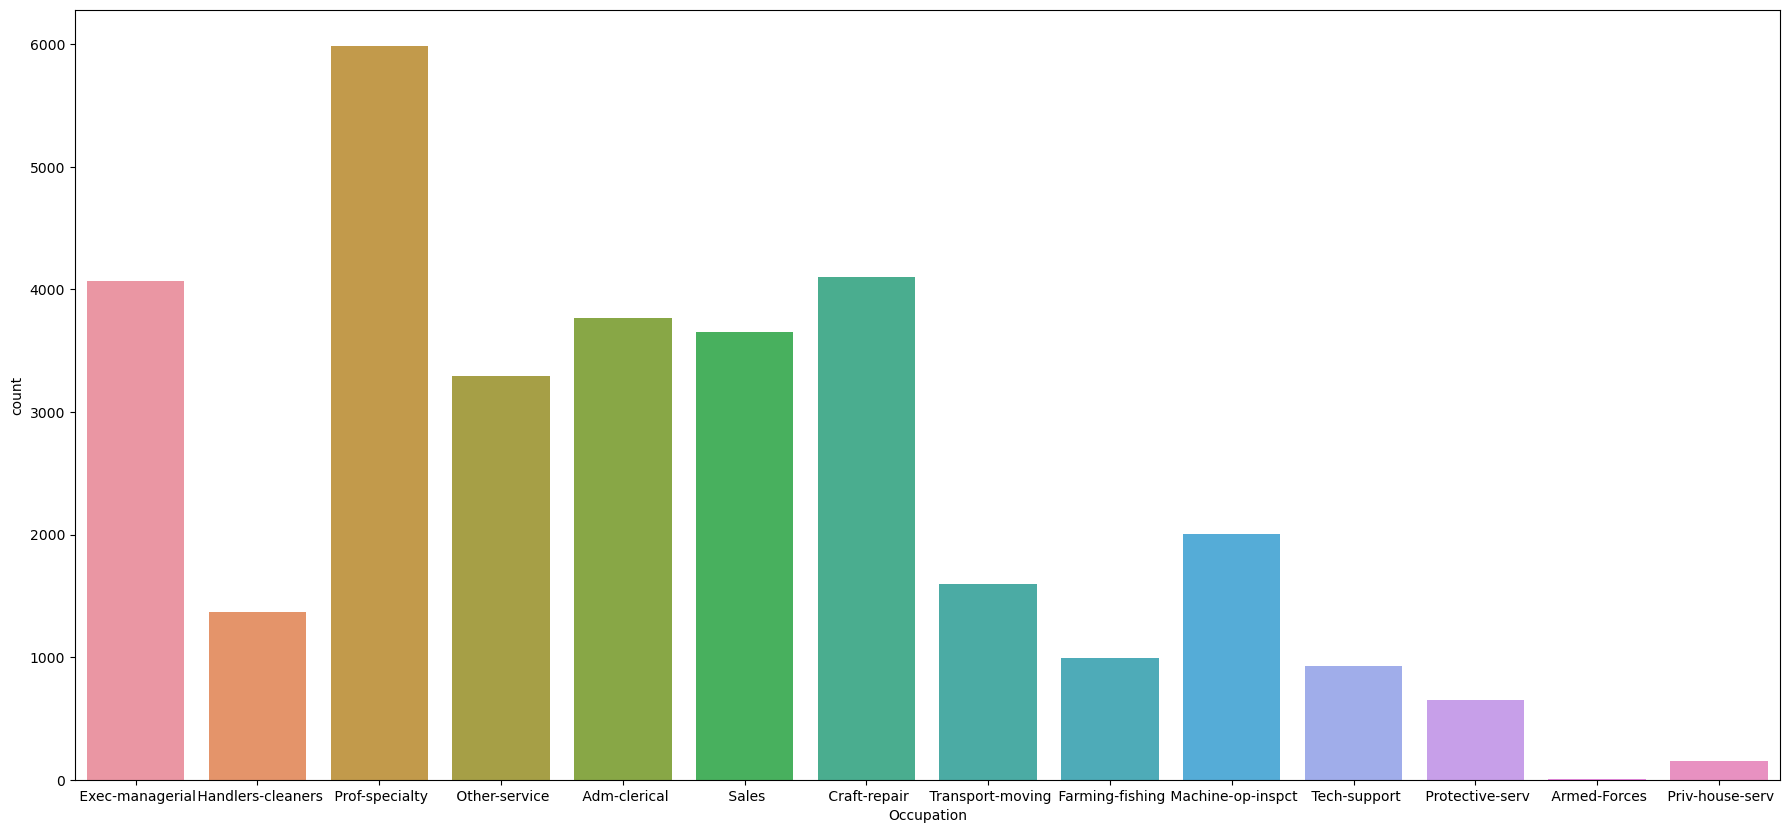

In [36]:
plt.figure(figsize = (22,10))
sns.countplot(ci['Occupation'])
plt.show()

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


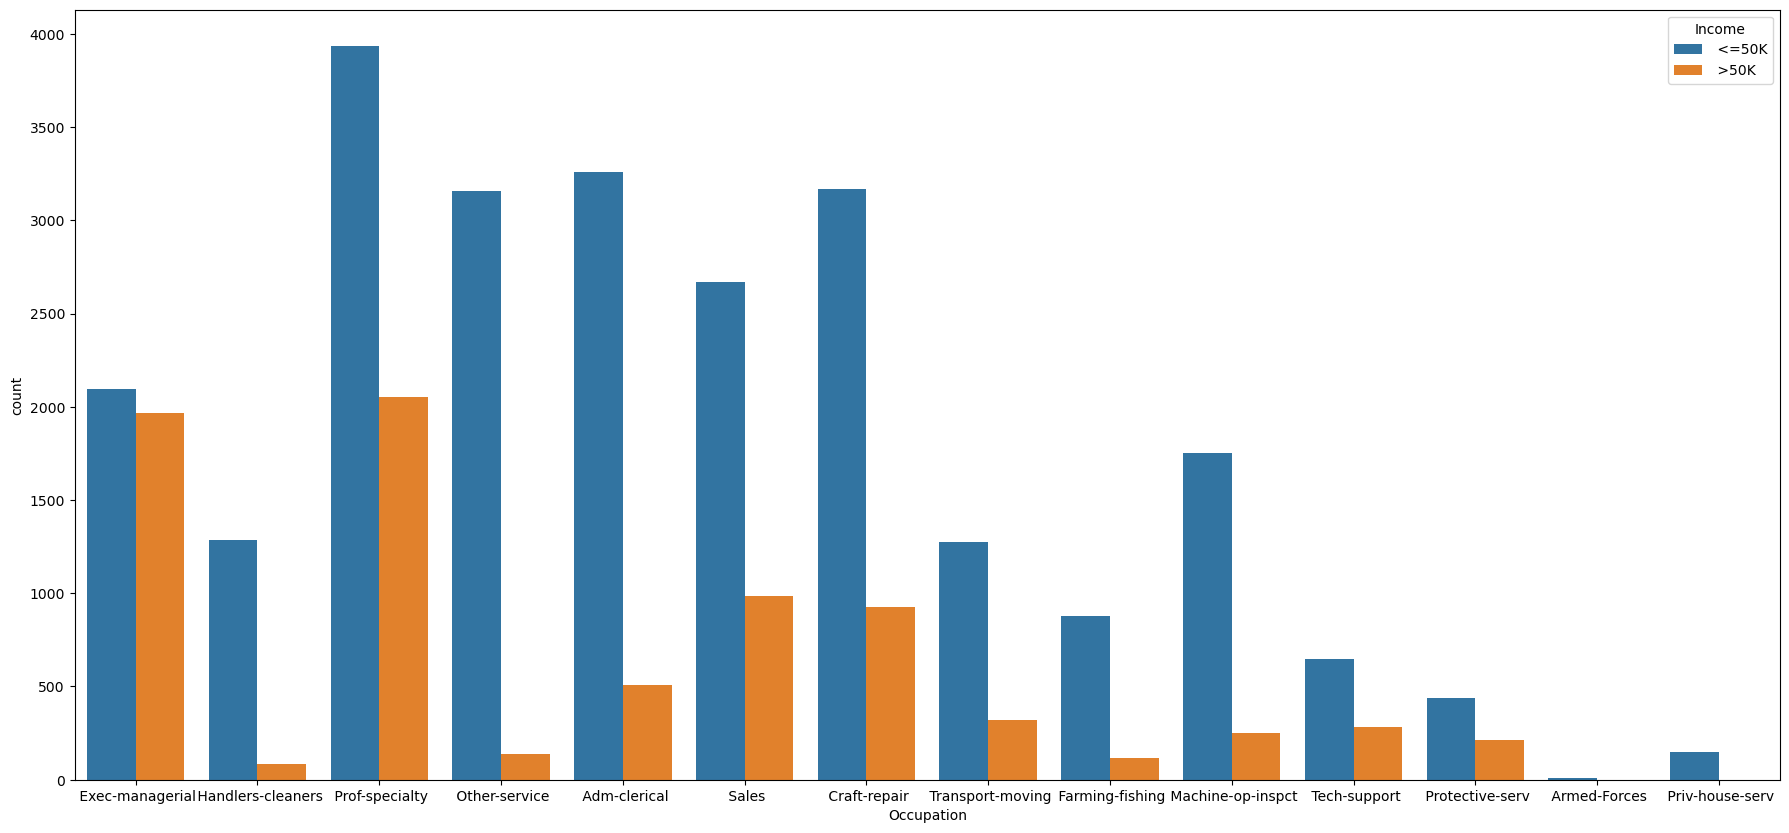

In [37]:
plt.figure(figsize = (22,10))
sns.countplot(ci['Occupation'], hue = ci['Income'])
plt.show()

In [38]:
pd.crosstab(ci['Income'], ci['Occupation'], margins = True)

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income,,,,,,,,,,,,,,,
<=50K,3262,8,3170,2098,879,1284,1752,3158,148,3933,438,2667,645,1277,24719
>50K,507,1,929,1968,115,86,250,137,1,2050,211,983,283,320,7841
All,3769,9,4099,4066,994,1370,2002,3295,149,5983,649,3650,928,1597,32560


In [39]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [40]:
ci['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


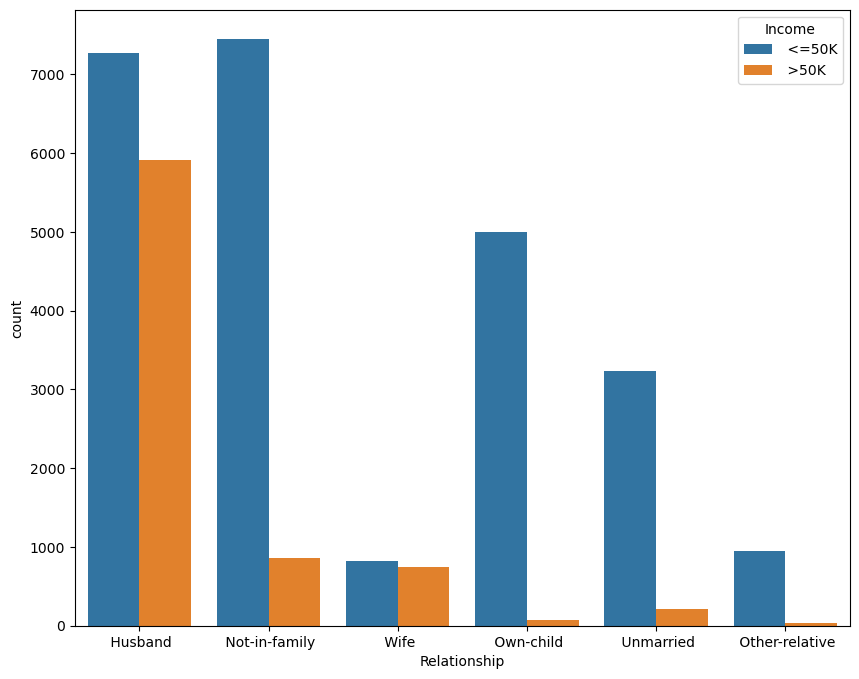

In [41]:
plt.figure(figsize = (10,8))
sns.countplot(ci['Relationship'], hue = ci['Income'])
plt.show()

In [42]:
pd.crosstab(ci['Income'], ci['Relationship'], margins = True)

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
Income,,,,,,,
<=50K,7275,7448,944,5001,3228,823,24719
>50K,5918,856,37,67,218,745,7841
All,13193,8304,981,5068,3446,1568,32560


In [43]:
ci['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


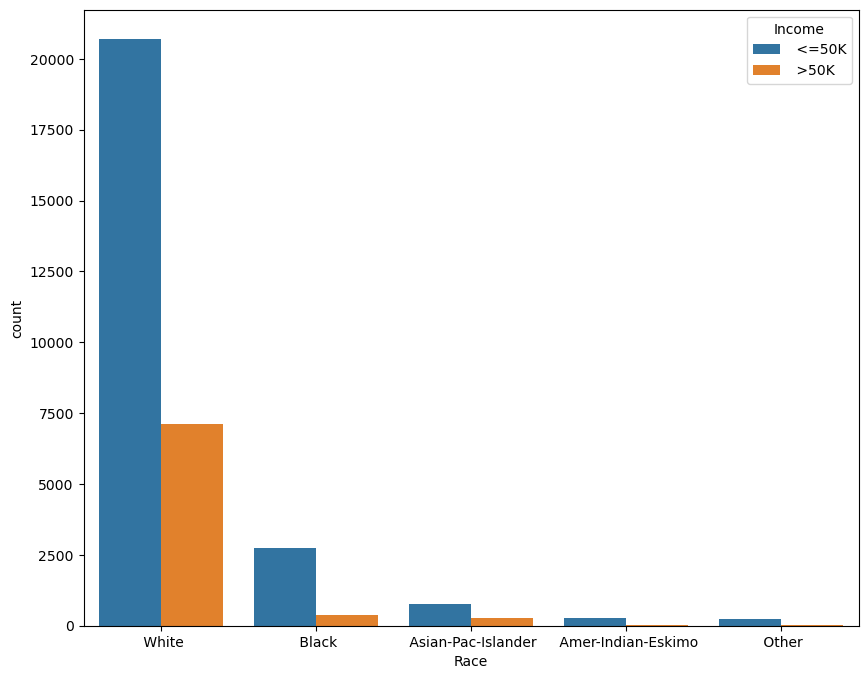

In [44]:
plt.figure(figsize = (10,8))
sns.countplot(ci['Race'], hue = ci['Income'])
plt.show()

In [45]:
pd.crosstab(ci['Income'], ci['Race'], margins = True)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Income,,,,,,
<=50K,275,763,2737,246,20698,24719
>50K,36,276,387,25,7117,7841
All,311,1039,3124,271,27815,32560


In [46]:
ci['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

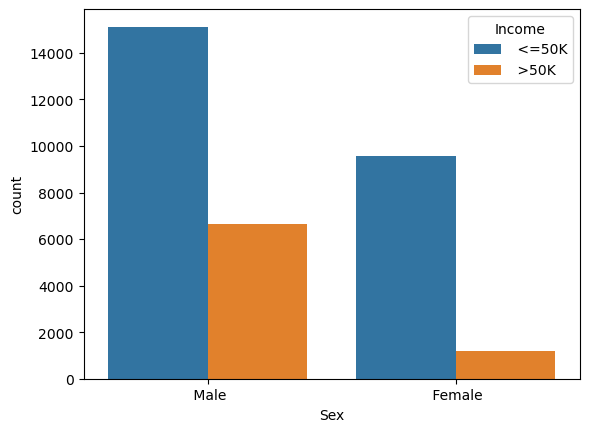

In [47]:
sns.countplot(ci['Sex'], hue = ci['Income'])

In [48]:
pd.crosstab(ci['Income'], ci['Sex'], margins = True)

Sex,Female,Male,All
Income,,,
<=50K,9592,15127,24719
>50K,1179,6662,7841
All,10771,21789,32560


In [49]:
ci['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [50]:
ci['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [51]:
ci.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [52]:
num =ci[['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss','Hours_per_week']]

In [53]:
num

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


In [54]:
from scipy.stats import zscore

In [55]:
Z = np.abs(zscore(num))
Z

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.145914,0.216663,0.035430
2,1.057031,0.425770,0.145914,0.216663,0.035430
3,0.775755,1.408146,0.145914,0.216663,0.035430
4,0.115952,0.898170,0.145914,0.216663,0.035430
...,...,...,...,...,...
32555,0.849066,0.639710,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.145914,0.216663,1.655200


In [56]:
threshold = 3
print(np.where(Z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([4, 3, 4, ..., 0, 4, 4], dtype=int64))


We will now convert our object type columns into integer and then we will be removing outliers which are been detected through the Z-score.

In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
oe = OrdinalEncoder()

for i in ci.columns:
    if ci[i].dtypes == 'object':
        ci[i] = oe.fit_transform(ci[i].values.reshape(-1,1))

In [59]:
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


Removing the Outliers

In [60]:
Census = ci[(Z<3).all(axis =1)]
Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [61]:
ci.shape

(32560, 15)

In [62]:
Census.shape

(30028, 15)

Here we can see that we have lost 2532 rows after removing the outliers from the data.

Now we will be checking the Skewness in the continous features and try to remove it.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


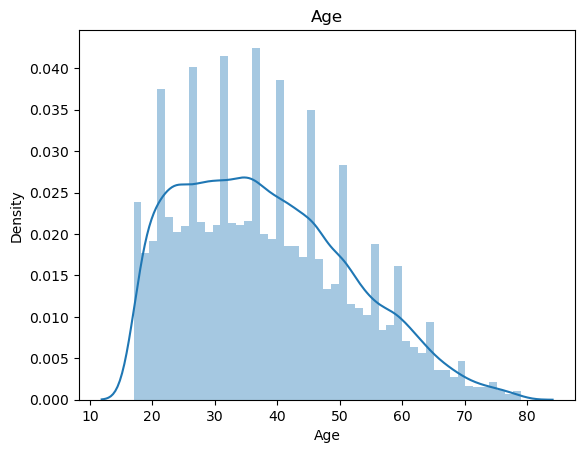

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


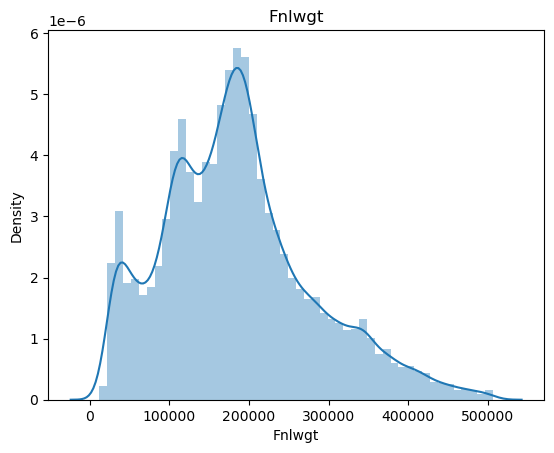

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


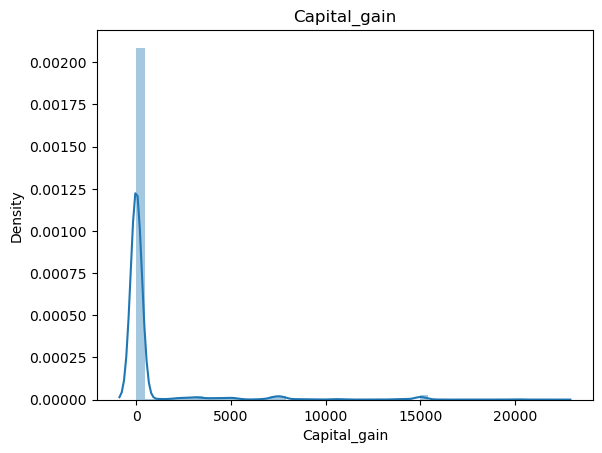

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


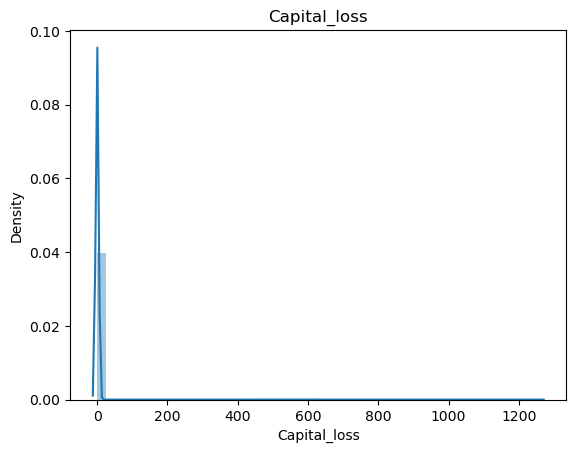

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


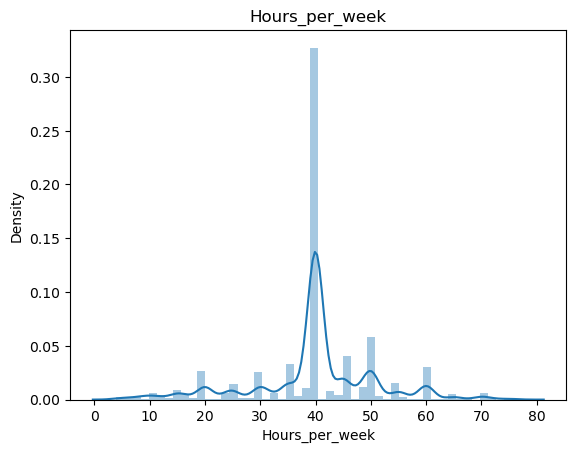

In [63]:
for i in Census[['Age', 'Fnlwgt','Capital_gain', 'Capital_loss', 'Hours_per_week']]:
    sns.distplot(Census[i])
    plt.title(i)
    plt.show()

In [64]:
Census.skew()

Age                0.489206
Workclass          0.093656
Fnlwgt             0.633615
Education         -0.927349
Education_num     -0.324321
Marital_status    -0.047716
Occupation         0.005921
Relationship       0.745900
Race              -2.431921
Sex               -0.681754
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
Native_country    -4.217552
Income             1.339595
dtype: float64

Observations:
    
1) Most of the columns in the set are Categorical columns so skewness values does not mean anything in categorical data.

2) Columns such as Capital_gain and Capital_loss are having skewness but the values are containing maximum no. of zero values and high number. So anywhich ways the skewness will be remained in the columns.

Checking for the correlation of the columns.

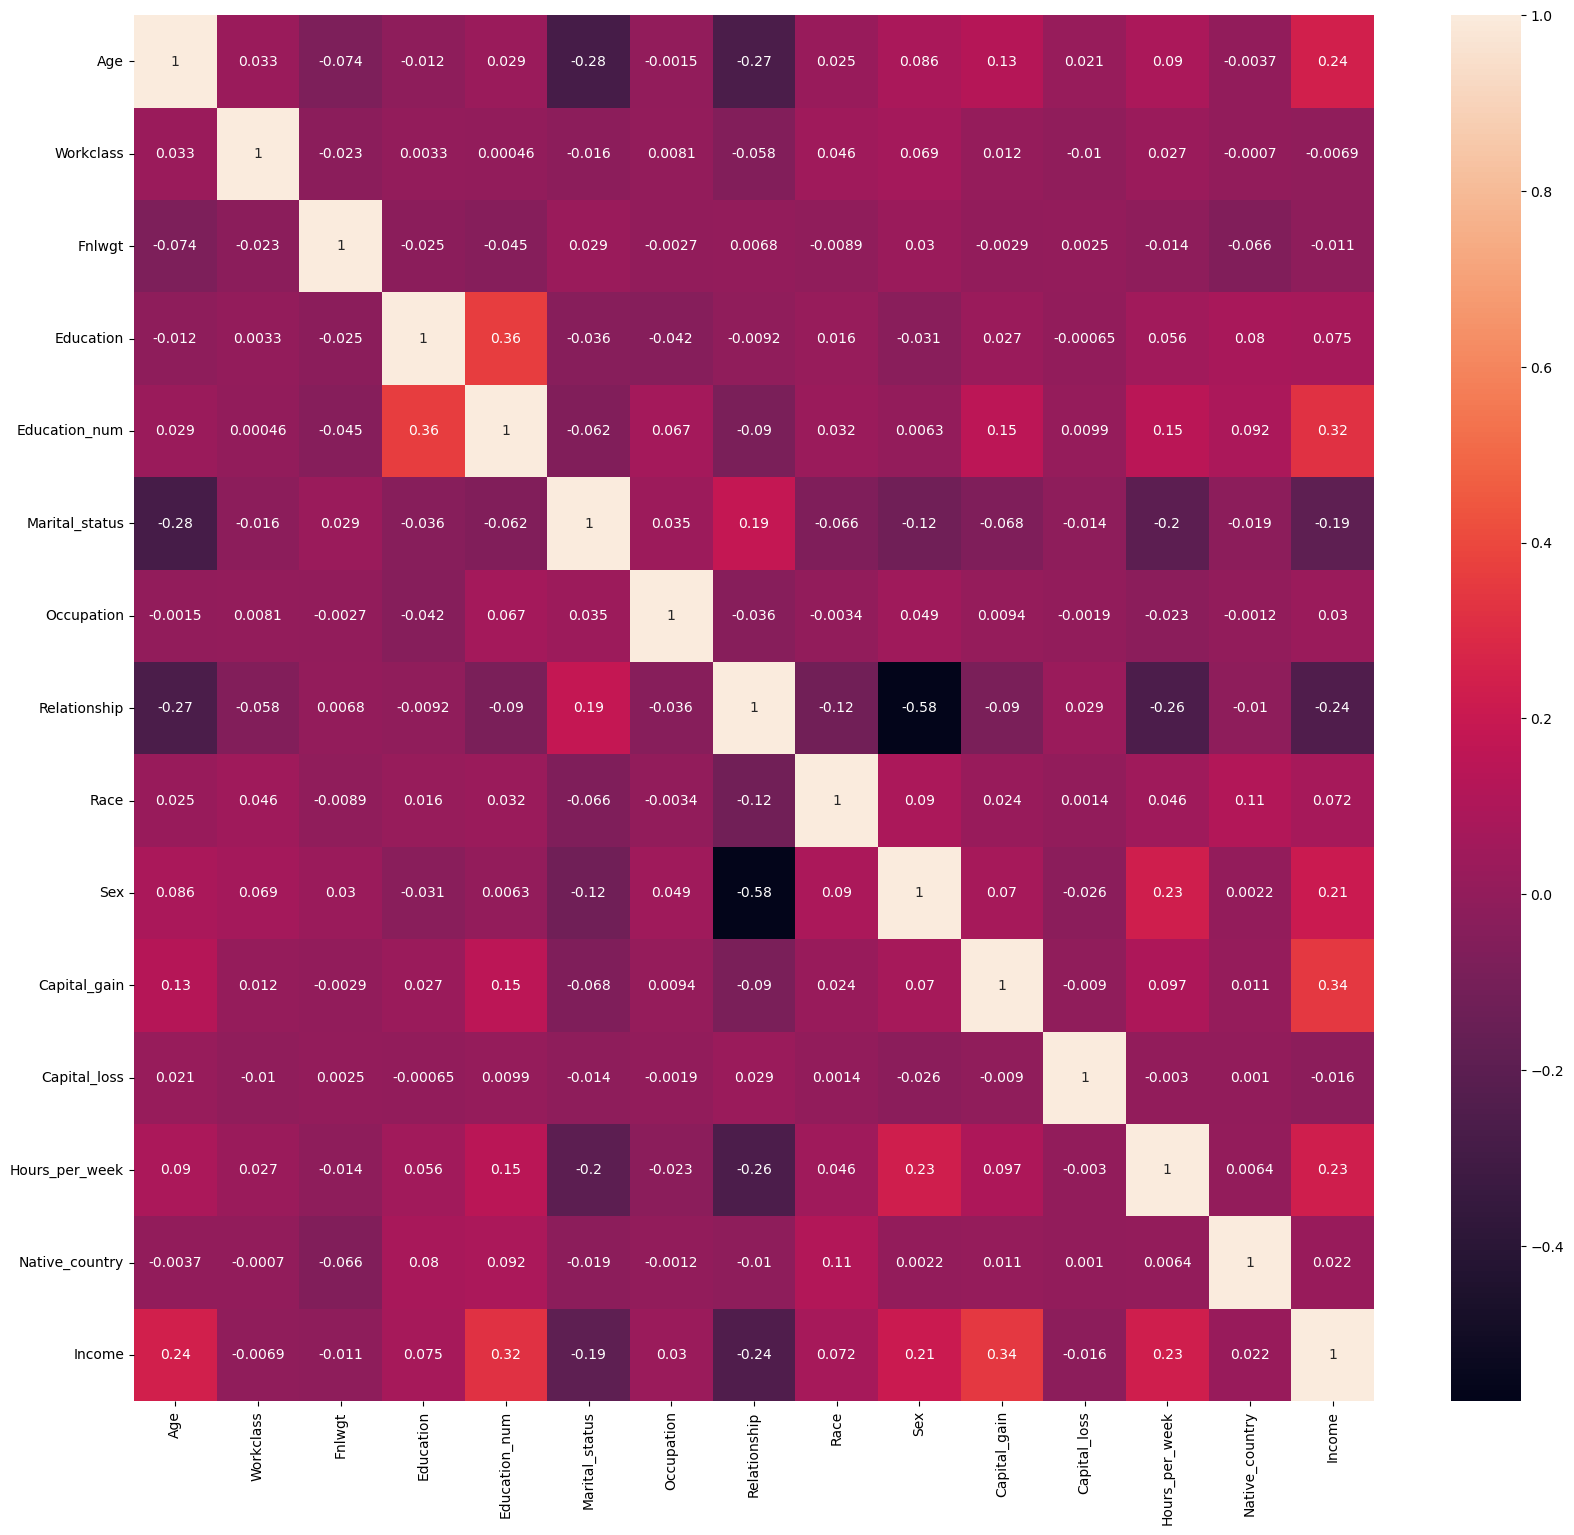

In [65]:
plt.figure(figsize = (20,18))
sns.heatmap(Census.corr(), annot = True)
plt.show()

Observations:
    
1) Capital Gain is the column which is having a highest positive correlation with the target varaible - Income.

2) Columns Relationship & Sex are having a highly negative correlation with eachother.


In [66]:
Census['Income'].value_counts()

0.0    23369
1.0     6659
Name: Income, dtype: int64

Hight Imbalance can be seen in the target variable hence we will be balancing it.

In [67]:
x = Census.drop('Income', axis = 1)
y = Census['Income']

In [68]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0


In [69]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 30028, dtype: float64

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [72]:
x1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.000000,83311,9.000000,13,2.0,3.000000,0.000000,4.0,1.000000,0,0,13,38.000000
1,38,3.000000,215646,11.000000,9,0.0,5.000000,1.000000,4.0,1.000000,0,0,40,38.000000
2,53,3.000000,234721,1.000000,7,2.0,5.000000,0.000000,2.0,1.000000,0,0,40,38.000000
3,28,3.000000,338409,9.000000,13,2.0,9.000000,5.000000,2.0,0.000000,0,0,40,4.000000
4,37,3.000000,284582,12.000000,14,2.0,3.000000,5.000000,4.0,0.000000,0,0,40,38.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46733,54,1.389010,95781,8.610990,12,2.0,3.583516,0.000000,4.0,1.000000,5178,0,48,38.000000
46734,28,4.502223,160772,2.737775,6,2.0,2.000000,0.000000,4.0,1.000000,0,0,36,36.008891
46735,56,1.109752,31749,14.112198,9,2.0,0.665851,3.890248,4.0,0.221950,0,0,41,38.000000
46736,45,3.000000,178072,13.723067,10,2.0,10.148711,0.000000,4.0,1.000000,0,0,41,38.000000


In [73]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
46733    1.0
46734    1.0
46735    1.0
46736    1.0
46737    1.0
Name: Income, Length: 46738, dtype: float64

In [74]:
y1.value_counts()

0.0    23369
1.0    23369
Name: Income, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

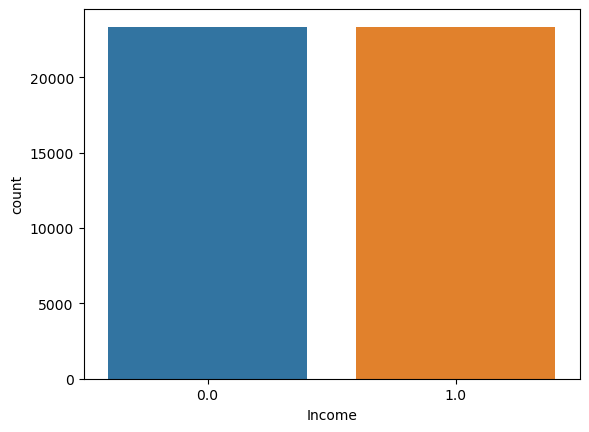

In [75]:
sns.countplot(y1)

So we can see that now our target variable is properly balanced, now we will proceed ahead with scaling the data and checking the variance inflation factor.

In [76]:
ci2 = pd.DataFrame(x1)

In [77]:
ci2['Income'] = y1

In [78]:
ci2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.000000,83311,9.000000,13,2.0,3.000000,0.000000,4.0,1.000000,0,0,13,38.000000,0.0
1,38,3.000000,215646,11.000000,9,0.0,5.000000,1.000000,4.0,1.000000,0,0,40,38.000000,0.0
2,53,3.000000,234721,1.000000,7,2.0,5.000000,0.000000,2.0,1.000000,0,0,40,38.000000,0.0
3,28,3.000000,338409,9.000000,13,2.0,9.000000,5.000000,2.0,0.000000,0,0,40,4.000000,0.0
4,37,3.000000,284582,12.000000,14,2.0,3.000000,5.000000,4.0,0.000000,0,0,40,38.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46733,54,1.389010,95781,8.610990,12,2.0,3.583516,0.000000,4.0,1.000000,5178,0,48,38.000000,1.0
46734,28,4.502223,160772,2.737775,6,2.0,2.000000,0.000000,4.0,1.000000,0,0,36,36.008891,1.0
46735,56,1.109752,31749,14.112198,9,2.0,0.665851,3.890248,4.0,0.221950,0,0,41,38.000000,1.0
46736,45,3.000000,178072,13.723067,10,2.0,10.148711,0.000000,4.0,1.000000,0,0,41,38.000000,1.0


In [79]:
x2 = ci2.iloc[:,:-1]
y2 = ci2.iloc[:,-1]

In [80]:
x2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.000000,83311,9.000000,13,2.0,3.000000,0.000000,4.0,1.000000,0,0,13,38.000000
1,38,3.000000,215646,11.000000,9,0.0,5.000000,1.000000,4.0,1.000000,0,0,40,38.000000
2,53,3.000000,234721,1.000000,7,2.0,5.000000,0.000000,2.0,1.000000,0,0,40,38.000000
3,28,3.000000,338409,9.000000,13,2.0,9.000000,5.000000,2.0,0.000000,0,0,40,4.000000
4,37,3.000000,284582,12.000000,14,2.0,3.000000,5.000000,4.0,0.000000,0,0,40,38.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46733,54,1.389010,95781,8.610990,12,2.0,3.583516,0.000000,4.0,1.000000,5178,0,48,38.000000
46734,28,4.502223,160772,2.737775,6,2.0,2.000000,0.000000,4.0,1.000000,0,0,36,36.008891
46735,56,1.109752,31749,14.112198,9,2.0,0.665851,3.890248,4.0,0.221950,0,0,41,38.000000
46736,45,3.000000,178072,13.723067,10,2.0,10.148711,0.000000,4.0,1.000000,0,0,41,38.000000


In [81]:
y2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
46733    1.0
46734    1.0
46735    1.0
46736    1.0
46737    1.0
Name: Income, Length: 46738, dtype: float64

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
ss = StandardScaler()

x3 = pd.DataFrame(ss.fit_transform(x2), columns = x2.columns)
x3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.817922,1.772316,-1.082696,-0.433589,1.078770,-0.329818,-0.851743,-0.777878,0.380984,0.631419,-0.330035,-0.03051,-2.780710,0.266069
1,-0.171591,-0.074220,0.327553,0.150665,-0.594228,-1.859935,-0.316673,-0.131977,0.380984,0.631419,-0.330035,-0.03051,-0.148424,0.266069
2,1.065300,-0.074220,0.530828,-2.770602,-1.430727,-0.329818,-0.316673,-0.777878,-2.195899,0.631419,-0.330035,-0.03051,-0.148424,0.266069
3,-0.996186,-0.074220,1.635796,-0.433589,1.078770,-0.329818,0.753469,2.451623,-2.195899,-1.705038,-0.330035,-0.03051,-0.148424,-5.776768
4,-0.254051,-0.074220,1.062180,0.442792,1.497020,-0.329818,-0.851743,2.451623,0.380984,-1.705038,-0.330035,-0.03051,-0.148424,0.266069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46733,1.147760,-1.561595,-0.949807,-0.547229,0.660521,-0.329818,-0.695632,-0.777878,0.380984,0.631419,1.265463,-0.03051,0.631512,0.266069
46734,-0.996186,1.312734,-0.257221,-2.262952,-1.848977,-0.329818,-1.119279,-0.777878,0.380984,0.631419,-0.330035,-0.03051,-0.538392,-0.087812
46735,1.312679,-1.819426,-1.632174,1.059821,-0.594228,-0.329818,-1.476211,1.734834,0.380984,-1.186461,-0.330035,-0.03051,-0.050932,0.266069
46736,0.405625,-0.074220,-0.072860,0.946146,-0.175978,-0.329818,1.060790,-0.777878,0.380984,0.631419,-0.330035,-0.03051,-0.050932,0.266069


We have standardize the data data using the Standard Scaler now we will check for Variance inflation factor.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
var = variance_inflation_factor

vif = pd.DataFrame()

vif['Values'] = [var(x3.values,i)for i in range(len(x3.columns))]
vif['Features'] = x3.columns
vif

,Values,Features
0,1.173187,Age
1,1.006746,Workclass
2,1.010872,Fnlwgt
3,1.104641,Education
4,1.174484,Education_num
5,1.139108,Marital_status
6,1.015808,Occupation
7,1.901112,Relationship
8,1.037062,Race
9,1.772024,Sex


So no multicolinearity can be seen and the values of all the columns for variance inflation factor seems to be in limit.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

Searching for Best Random Score.

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x3,y2,test_size = 0.30, random_state = 42)

In [92]:
lg = LogisticRegression()

lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
lgac = accuracy_score(y_test, lgpred)
lgcon = confusion_matrix(y_test, lgpred)
lgclass = classification_report(y_test, lgpred)

print(lgac.round(2))
print(lgcon)
print(lgclass)

0.77
[[5225 1834]
 [1431 5532]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      7059
         1.0       0.75      0.79      0.77      6963

    accuracy                           0.77     14022
   macro avg       0.77      0.77      0.77     14022
weighted avg       0.77      0.77      0.77     14022



In [95]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcac = accuracy_score(y_test, rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print(rfcac.round(2))
print(rfccon)
print(rfcclass)

0.9
[[6447  612]
 [ 774 6189]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7059
         1.0       0.91      0.89      0.90      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



In [96]:
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)
etcpred = etc.predict(x_test)
etcac = accuracy_score(y_test, etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print(etcac.round(2))
print(etccon)
print(etcclass)

0.9
[[6371  688]
 [ 720 6243]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      7059
         1.0       0.90      0.90      0.90      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



In [97]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcac = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print(svcac.round(2))
print(svccon)
print(svcclass)

0.85
[[5727 1332]
 [ 715 6248]]
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      7059
         1.0       0.82      0.90      0.86      6963

    accuracy                           0.85     14022
   macro avg       0.86      0.85      0.85     14022
weighted avg       0.86      0.85      0.85     14022



In [99]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)
gbcpred = gbc.predict(x_test)
gbcac = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test,gbcpred)

print(gbcac.round(2))
print(gbccon)
print(gbcclass)

0.9
[[6394  665]
 [ 787 6176]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7059
         1.0       0.90      0.89      0.89      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



In [101]:
adc = AdaBoostClassifier()

adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcac = accuracy_score(y_test, adcpred)
adccon = confusion_matrix(y_test, adcpred)
adcclass = classification_report(y_test, adcpred)

print(adcac.round(2))
print(adccon)
print(adcclass)

0.88
[[6146  913]
 [ 705 6258]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      7059
         1.0       0.87      0.90      0.89      6963

    accuracy                           0.88     14022
   macro avg       0.88      0.88      0.88     14022
weighted avg       0.88      0.88      0.88     14022



In [103]:
bc = BaggingClassifier()

bc.fit(x_train,y_train)
bcpred = bc.predict(x_test)
bcac = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print(bcac.round(2))
print(bccon)
print(bcclass)

0.89
[[6445  614]
 [ 926 6037]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      7059
         1.0       0.91      0.87      0.89      6963

    accuracy                           0.89     14022
   macro avg       0.89      0.89      0.89     14022
weighted avg       0.89      0.89      0.89     14022



The Accuracy Score for the all the models is as below.

In [104]:
print('The accuracy score for Logistic Regression is', lgac.round(2))
print('The accuracy score for Random Forest', rfcac.round(2))
print('The accuracy score for Extra Trees', etcac.round(2))
print('The accuracy score for Support Vector', svcac.round(2))
print('The accuracy score for Gradient Boost', gbcac.round(2))
print('The accuracy score for Ada Boost', adcac.round(2))
print('The accuracy score for Bagging Classifier', bcac.round(2))

The accuracy score for Logistic Regression is 0.77
The accuracy score for Random Forest 0.9
The accuracy score for Extra Trees 0.9
The accuracy score for Support Vector 0.85
The accuracy score for Gradient Boost 0.9
The accuracy score for Ada Boost 0.88
The accuracy score for Bagging Classifier 0.89


Three models - Random Forest, Extra Trees, Gradient Boost seems to have highest accuracy score with 90%. We will check ahead with cross val score for all models.

In [106]:
from sklearn.model_selection import cross_val_score

In [109]:
cvs = cross_val_score

print('Cross val score for Logistic Regression', cvs(lg,x3,y2).mean())
print('Cross val score for Random Forest', cvs(rfc,x3,y2).mean())
print('Cross val score for Extra Trees', cvs(etc,x3,y2).mean())
print('Cross val score for Support Vector', cvs(svc,x3,y2).mean())
print('Cross val score for Gradient Boost', cvs(gbc,x3,y2).mean())
print('Cross val score for Ada Boost', cvs(adc,x3,y2).mean())
print('Cross val score for Bagging Classifier', cvs(bc,x3,y2).mean())

Cross val score for Logistic Regression 0.76667806113174
Cross val score for Random Forest 0.8855775348026744
Cross val score for Extra Trees 0.8879522141130316
Cross val score for Support Vector 0.8498660658226523
Cross val score for Gradient Boost 0.8855343924005649
Cross val score for Ada Boost 0.8744724451940652
Cross val score for Bagging Classifier 0.8766127986348982


So looking at Cross val score all seems similar, out of which Random Forest seems a bit better. Hence we will select it as the best model and go ahead with hyper parameter tunning.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param = {'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],
        'max_features': ['auto', 'sqrt', 'log2']}

In [112]:
gcv = GridSearchCV(RandomForestClassifier(), param, cv =5)

In [113]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [114]:
gcv.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}

In [116]:
fm = RandomForestClassifier(max_depth = 20 , max_features = 'auto', n_estimators = 200)

In [118]:
fm.fit(x_train,y_train)
fmpred = fm.predict(x_test)
fmac = accuracy_score(y_test, fmpred)
fmcon = confusion_matrix(y_test, fmpred)
fmclass = classification_report(y_test, fmpred)

print(fmac.round(2))
print(fmcon)
print(fmclass)

0.9
[[6436  623]
 [ 734 6229]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      7059
         1.0       0.91      0.89      0.90      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



We have done hyper parameter tunning of our best model. Now we will go ahead and save it as final model.

In [119]:
import joblib

In [120]:
joblib.dump(fm, 'Census Income')

['Census Income']

In [121]:
model = joblib.load('Census Income')

In [122]:
predi = model.predict(x_test)

In [123]:
A = np.array(y_test)

In [124]:
df = pd.DataFrame()

df['Predicted'] = predi
df['Original'] = A
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
14017,1.0,1.0
14018,0.0,0.0
14019,1.0,1.0
14020,0.0,0.0


In [127]:
from sklearn.metrics import roc_curve, auc

In [128]:
fpr,tpr,_ = roc_curve(predi, A)

In [129]:
roc_auc = auc(fpr,tpr)

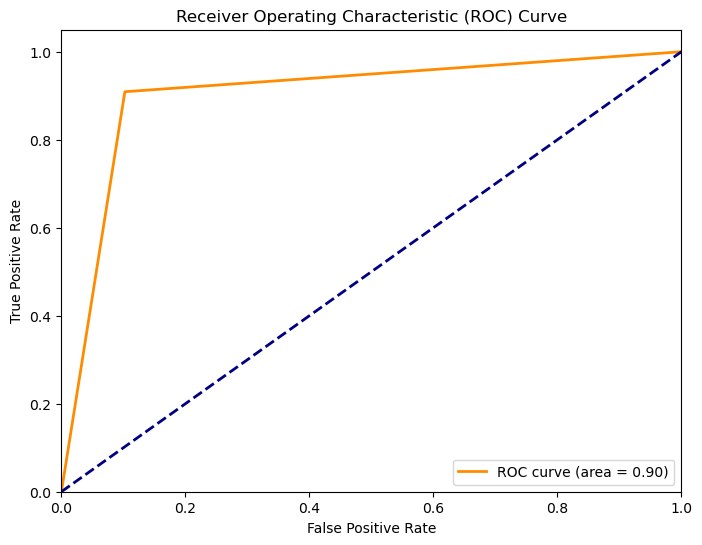

In [131]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion:
    
## The Accuracy score for predicting the census income is 90%